<a href="https://colab.research.google.com/github/Shatha-AI/Shatha/blob/main/AI342Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2




## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [8]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
image= np.zeros((8,8))
print(image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image? represents the number of pixels
# in the image and defines the level of spatial detail
# 2. What does each value represent? color black

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

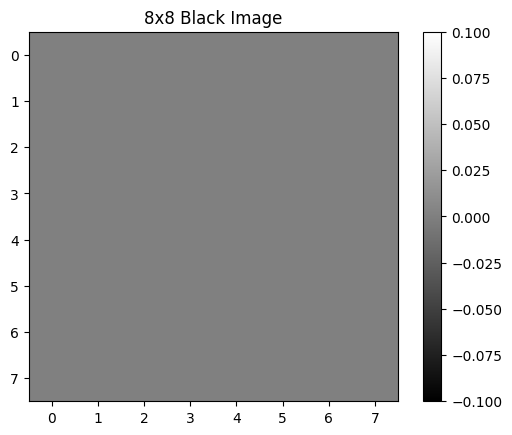

In [9]:
# write your code here

# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:
plt.imshow(image, cmap='gray')
plt.title('8x8 Black Image')
plt.colorbar()
plt.show()

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


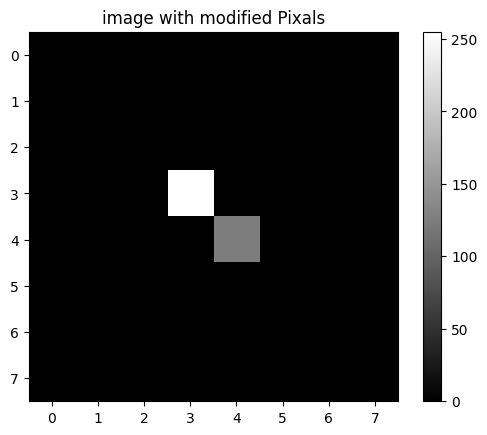

In [10]:
# write your code here
image[3,3]=255
image[4,4]=125
plt.imshow(image,cmap='gray')
plt.title('image with modified Pixals')
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why? 255 because pixel values represent light intensity
#2.	How does quantisation affect visual appearance?loss of detail and visible banding artifacts in the image


## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


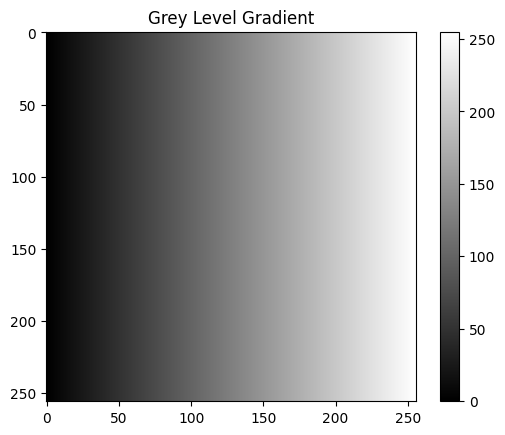

In [11]:
# write your code here

generate= np.tile(np.linspace(0,255,256),(256,1))
plt.imshow(generate,cmap='gray')
plt.title('Grey Level Gradient')
plt.colorbar()
plt.show()
#Questions
#1.	How many grey levels are visible? 256 levels
#2.	What data type is used to store the pixel values?float


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(366, 550, 3)
uint8


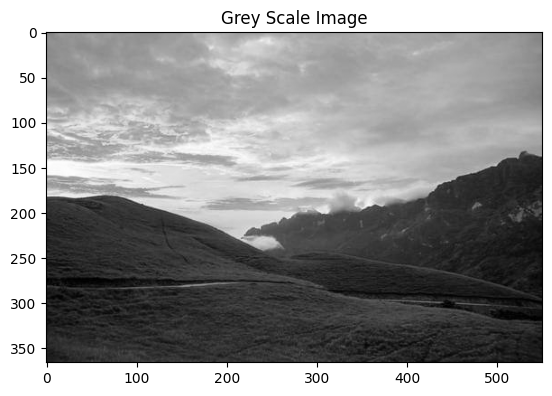

In [15]:
# write your code here
from matplotlib.image import imread

image =imread('/photo_2026-02-12_20-04-18.jpg')
print(image.shape)
print(image.dtype)
#Task
#Convert the image to grey scale by averaging the colour channels.
gray = image.mean(axis=2)

plt.imshow(gray, cmap='gray')
plt.title("Grey Scale Image")
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

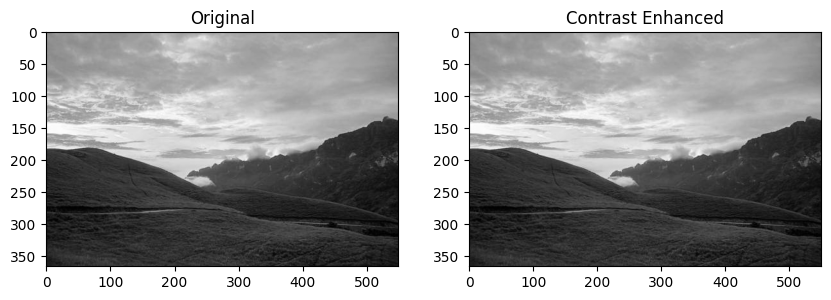

In [16]:
# write your code here

min_val = gray.min()
max_val = gray.max()

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')

plt.title("Contrast Enhanced")
plt.show()
#Questions
#1.	Which image has better visibility of details?contrast enhanced image has better
#2.	Is this enhancement subjective or objective? objective


## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

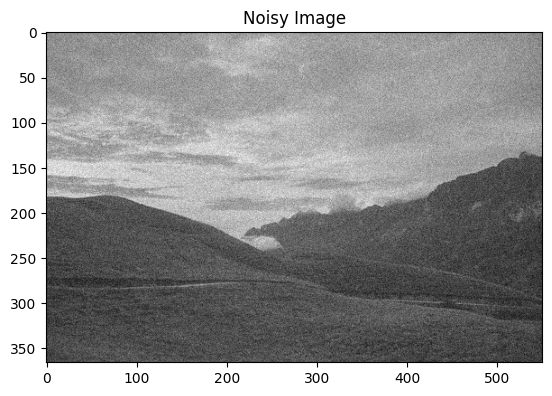

In [17]:
# write your code here
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

## **Exercise 7.2: Simple smoothing filter**

In [18]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here


## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

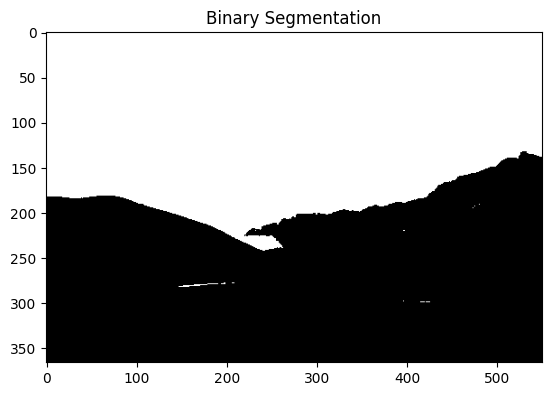

In [19]:
## write your code here
threshold = gray.mean()
binary = gray > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable? no
# 2. What information is lost when converting to binary?texture and brightness details disappear.

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

**Create a synthetic image containing at least two objects**

we created a synthetic digital image using NumPy and to create an objects ,we select apixel and change its color

In [ ]:
# Create a synthetic image containing at least two objects
image= np.zeros((8,8))
image[3,2]=50
image[3,4]=255
image[3,6]=125
plt.imshow(image,cmap='gray')
plt.title('image with modified Pixals')
plt.colorbar()
plt.show()

**Add noise to the image**

we ues Gaussian distribution to simulate Sensor noise
mean =0 and standard deviation=20 and size noise =size image

In [ ]:
#Add noise to the image
noise=np.random.normal(0,20,image.shape)
noisy=image+noise
plt.imshow(noisy,cmap='gray')
plt.title('Noisy Image')
plt.show()


**Apply enhancement and denoising **

contrast enhancement and noise removal were applied to improve image quality .
mage Enhancement improving contrast for better visual quality.

Image Restoration reducing noise to recover the underlying image.


In [ ]:
#Apply enhancement and denoising
min_val=noisy.min()
max_val=noisy.max()
enhanced=(noisy-min_val)/(max_val-min_val)*255
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy,cmap='gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(enhanced,cmap='gray')
plt.title('Contrast Enhanced')


def mean_filter(img,k=3):
  pad=k//2
  padded=np.pad(img,pad,mode='edge')
  output=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      output[i,j]=padded[i:i+k,j:j+k].mean()
  return output
denoised =mean_filter(noisy)


plt.subplot(1,2,2)
plt.imshow(denoised,cmap='gray')
plt.title("Denoised")

plt.show()

**Segment the objects using a threshold**

thresholding was applied to segment the objects from the background.
The threshold value was chosen as the mean intensity of the image,producing a binary image.

In [ ]:
#Segment the objects using a threshold
threshold=image.mean()
binary=image>threshold
plt.imshow(binary,cmap='gray')
plt.title('Binary Segmentation')
plt.show()

**1. Where does image processing end and image analysis begin in your mini project?**

Image processing ends after enhancement, denoising, and segmentation,Image analysis begins if we do Representation and Description and Object Recognition

**2. Which steps correspond to low level processing only?**
synthtic image creation ,Adding noise, Contrast enhancement , denoising

**3. Why is digitisation always an approximation of reality?**
Continuous intensity values are quantised into finite levels,some detail and subtle variations are inevitably lost



